# <center> Orbit Classification </center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

from sklearn.metrics import accuracy_score,classification_report
%matplotlib inline
warnings.filterwarnings('ignore')

## Import danych oraz wyświetlenie podstawowych informacji

In [2]:
data = pd.read_csv('learn_orbits_data.csv')

In [3]:
data.head()

a (AU)         e    i (deg)     w (deg)  Node (deg)     M (deg)  q (AU)  \
0  1.078066  0.826854  22.825495   31.382966   88.010681  215.528772  0.1867   
1  1.245304  0.335342  13.337482  276.893024  337.207958  104.155607  0.8277   
2  1.470264  0.559922   6.352995  285.852564   35.736768  174.626213  0.6470   
3  1.776025  0.650141  39.832538  267.791993  356.903343  173.188556  0.6214   
4  1.874123  0.764602   1.326399   43.388048  349.694944  235.158622  0.4412   

   Q (AU)  P (yr)  H (mag)  MOID (AU) class  
0    1.97    1.12    16.90   0.034507  APO*  
1    1.66    1.39    15.60   0.030669  APO*  
2    2.29    1.78    16.25   0.025795  APO*  
3    2.93    2.37    15.20   0.003551  APO*  
4    3.31    2.57    18.80   0.011645  APO*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a (AU)      1748 non-null   float64
 1   e           1748 non-null   float64
 2   i (deg)     1748 non-null   float64
 3   w (deg)     1748 non-null   float64
 4   Node (deg)  1748 non-null   float64
 5   M (deg)     1748 non-null   float64
 6   q (AU)      1748 non-null   float64
 7   Q (AU)      1748 non-null   float64
 8   P (yr)      1748 non-null   float64
 9   H (mag)     1748 non-null   float64
 10  MOID (AU)   1748 non-null   float64
 11  class       1748 non-null   object 
dtypes: float64(11), object(1)
memory usage: 164.0+ KB


In [5]:
data['class'].unique()

array(['APO*', 'ATE*', 'AMO*', 'APO', 'IEO*', 'ATE'], dtype=object)

In [24]:
data.describe()

a (AU)            e      i (deg)      w (deg)   Node (deg)  \
count  1748.000000  1748.000000  1748.000000  1748.000000  1748.000000   
mean      1.745759     0.527417    13.312400   180.497546   172.251967   
std       0.690729     0.179629    11.614397    99.661178   102.737794   
min       0.635223     0.025425     0.146084     0.521838     0.136042   
25%       1.265084     0.408588     4.875430    95.635077    82.401816   
50%       1.698290     0.549531     9.315508   185.986518   168.528048   
75%       2.179176     0.653530    18.796947   266.913890   256.374858   
max      17.818679     0.956042    75.412403   359.662669   359.854602   

           M (deg)       q (AU)       Q (AU)       P (yr)      H (mag)  \
count  1748.000000  1748.000000  1748.000000  1748.000000  1748.000000   
mean    180.809702     0.756564     2.735000     2.423793    19.966796   
std     107.280935     0.221101     1.344958     2.088742     1.506929   
min       0.052165     0.092800     0.960000     0.510000    14.100000   
25%      83.230489     0.617025     1.767500     1.420000    19.100000   
50%     182.880959     0.815600     2.605000     2.210000    20.200000   
75%     275.895719     0.936075     3.580000     3.220000    21.200000   
max     359.825201     1.060100    34.680000    75.220000    22.400000   

         MOID (AU)  
count  1748.000000  
mean      0.023348  
std       0.014309  
min       0.000010  
25%       0.011070  
50%       0.022994  
75%       0.034802  
max       0.049987

## Opis danych

a (AU) -- Semi-major axis of the orbit in AU <br>
e -- Eccentricity of the orbit <br>
i (deg) -- Inclination of the orbit with respect to the ecliptic plane and the equinox of J2000 (J2000-Ecliptic) in degrees <br>
w (deg) -- Argument of perihelion (J2000-Ecliptic) in degrees <br>
Node (deg) -- Longitude of the ascending node (J2000-Ecliptic) in degrees <br>
M (deg) -- Mean anomoly at epoch in degrees <br>
q (AU) -- Perihelion distance of the orbit in AU <br>
Q (AU) -- Aphelion distance of the orbit in AU <br>
P (yr) -- Orbital period in Julian years <br>
H (mag) -- Absolute V-magnitude <br>
MOID (AU) -- Minimum orbit intersection distance (the minimum distance between the osculating orbits of the NEO and the Earth <br>
class -- Object classification <br>

## Sprawdzenie czy występują brakujące dane

<Axes: >

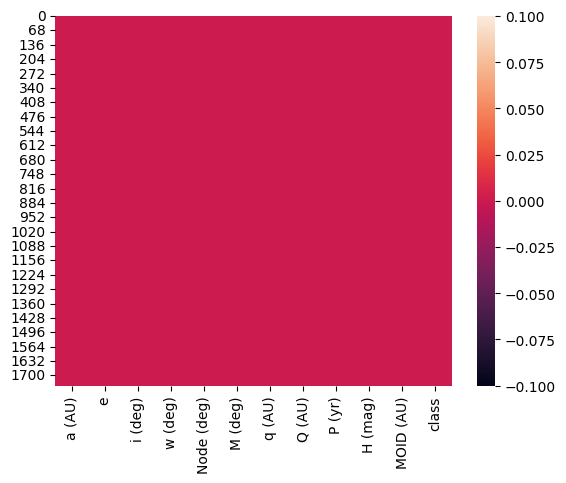

In [6]:
sns.heatmap(data.isnull())

## Korelacja zmiennych

<Axes: >

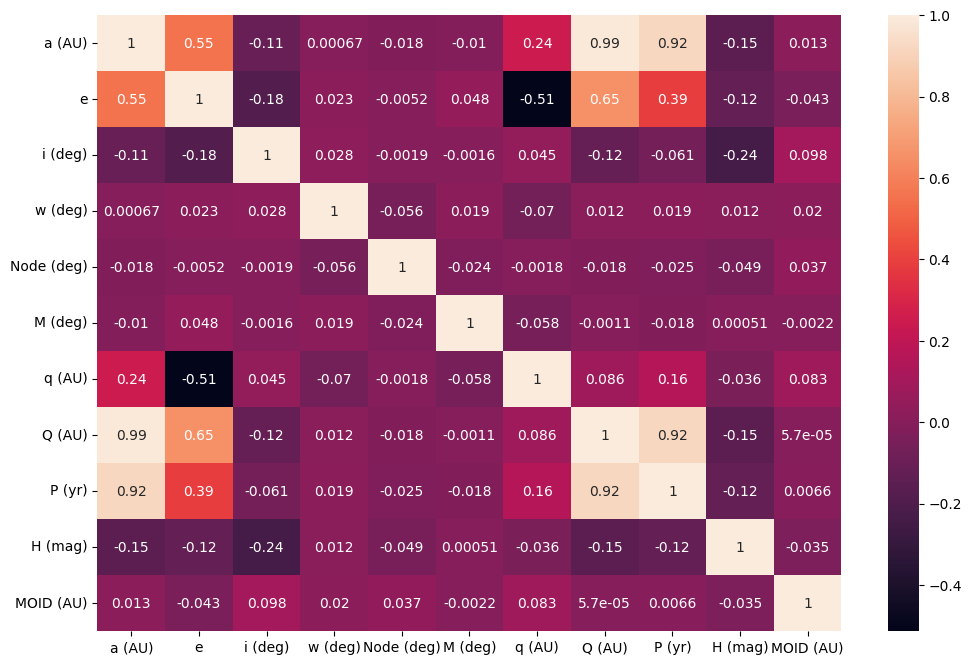

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data.iloc[:,:-1].corr(),annot=True)

## Analiza danych

In [8]:
data.columns

Index(['a (AU)', 'e', 'i (deg)', 'w (deg)', 'Node (deg)', 'M (deg)', 'q (AU)',
       'Q (AU)', 'P (yr)', 'H (mag)', 'MOID (AU)', 'class'],
      dtype='object')

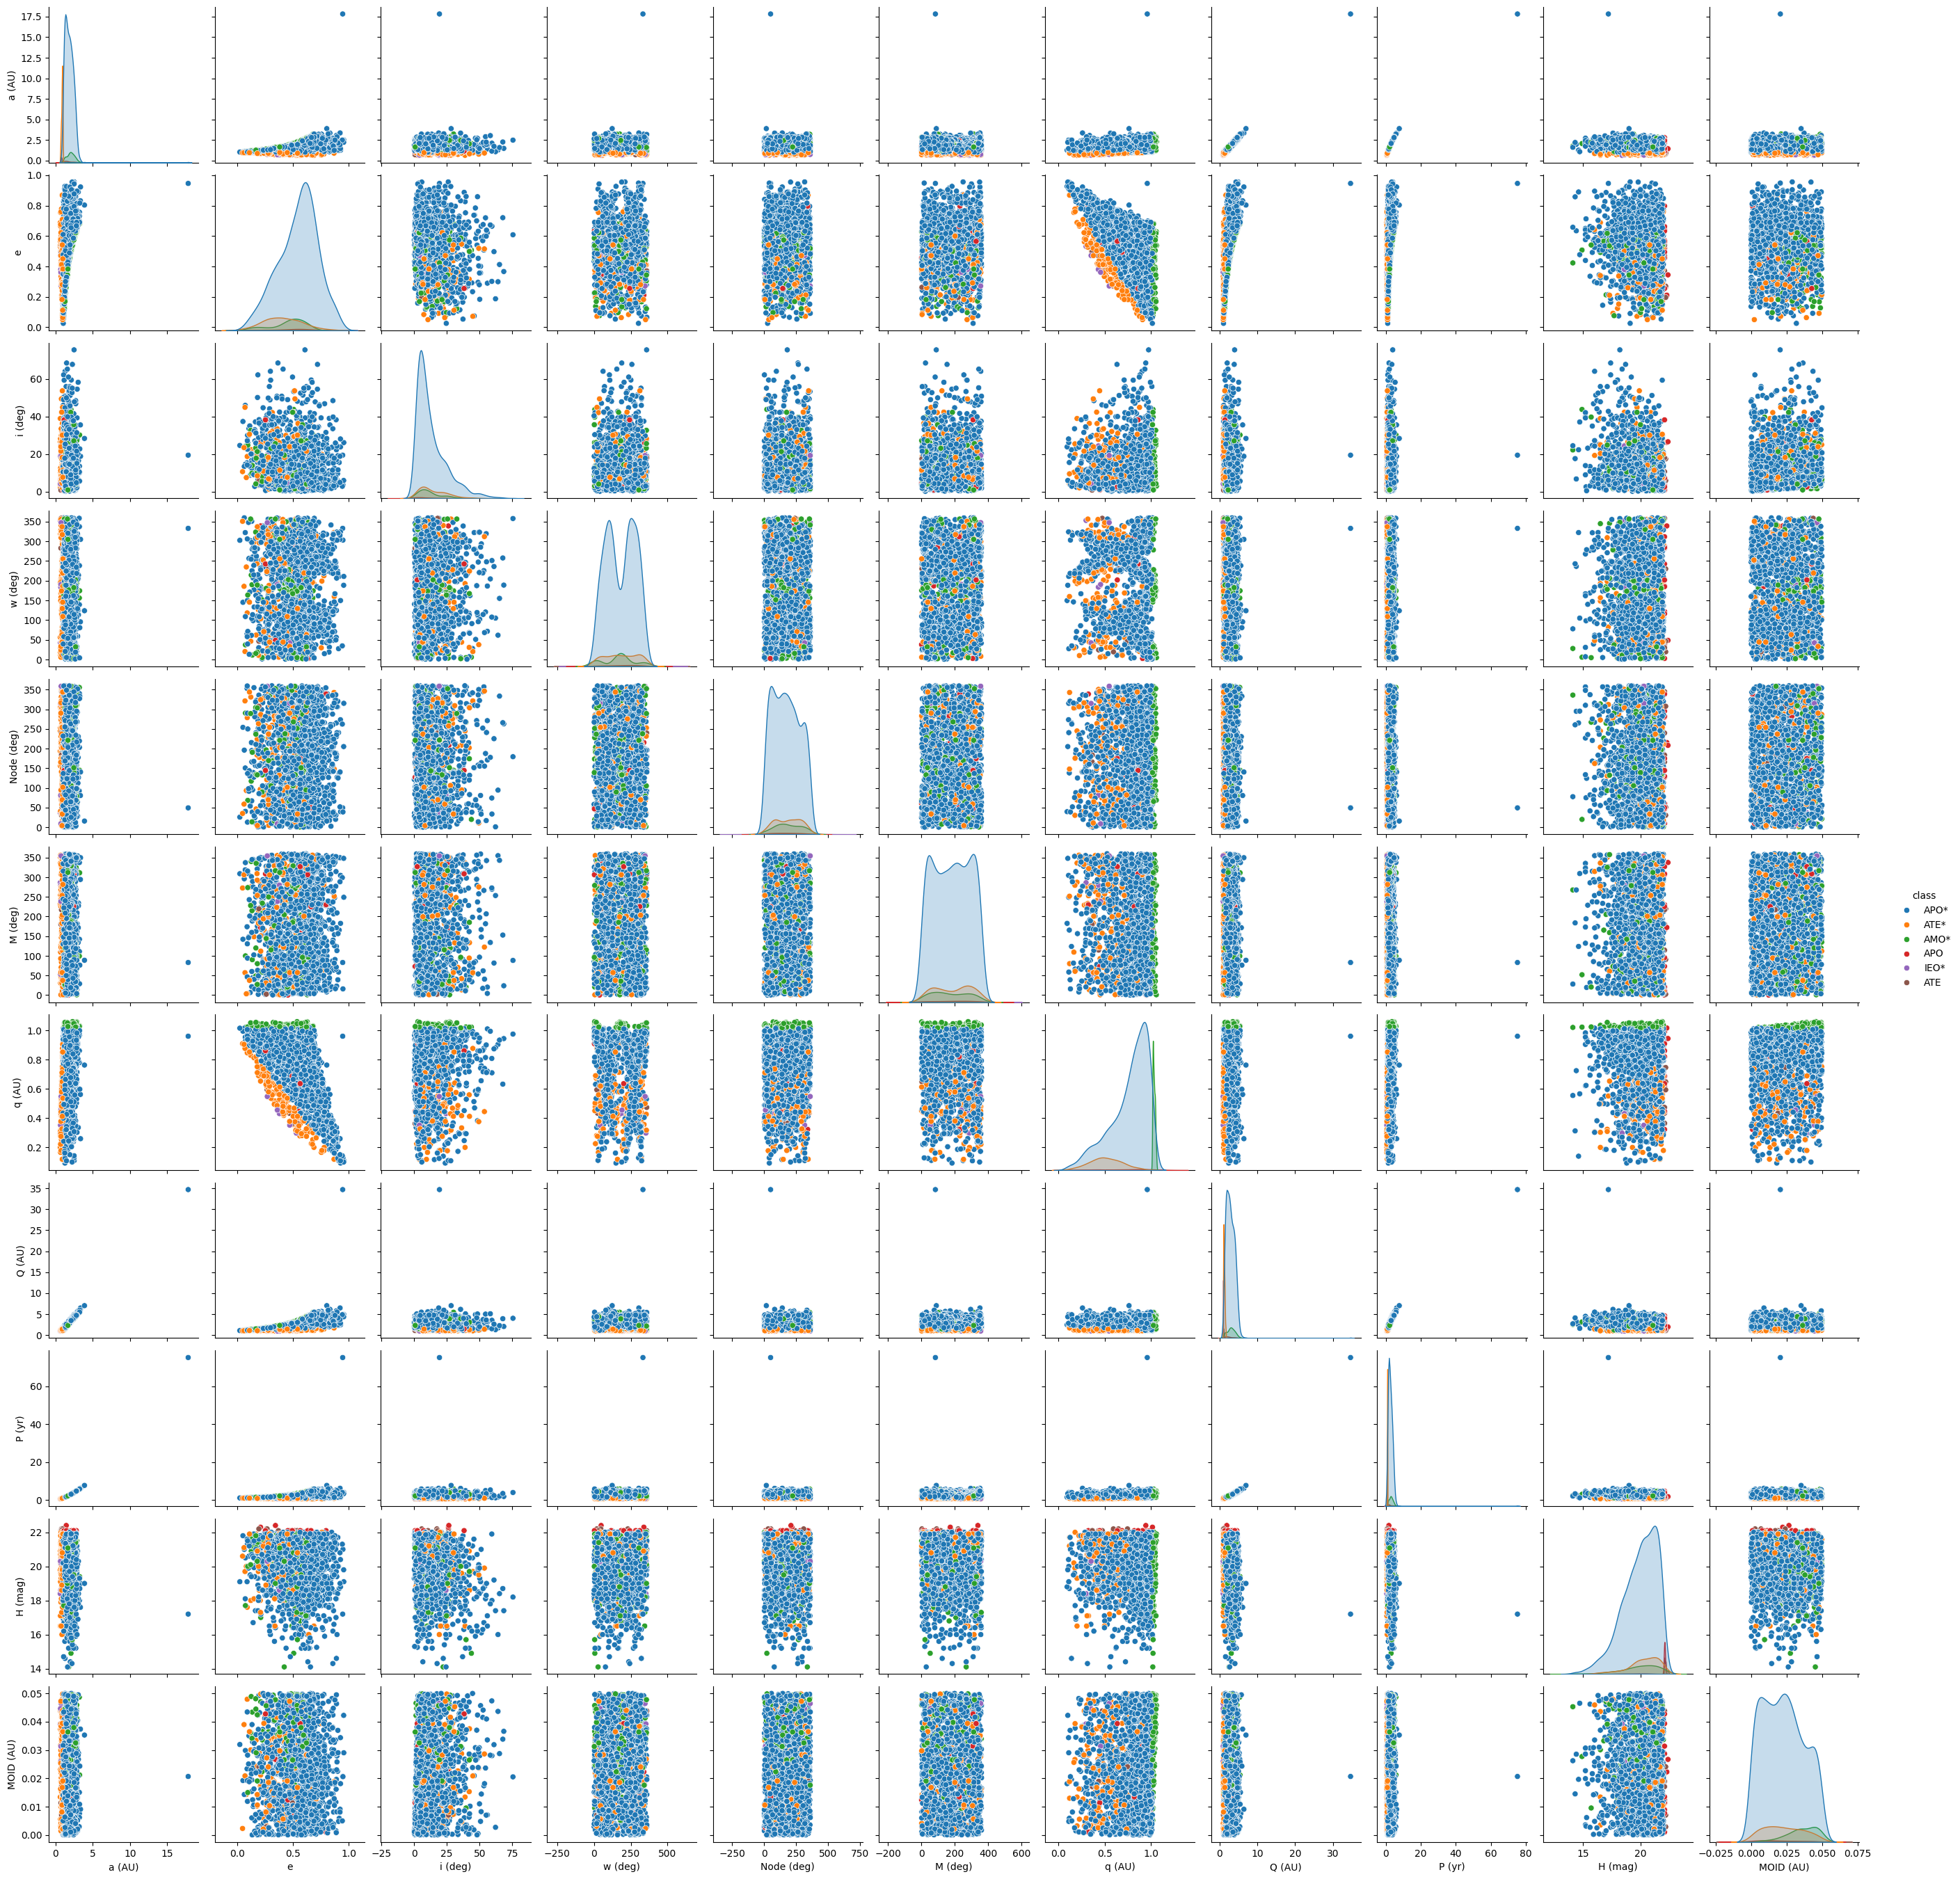

In [9]:
sns.pairplot(data=data,hue='class')

<Axes: xlabel='class', ylabel='Node (deg)'>

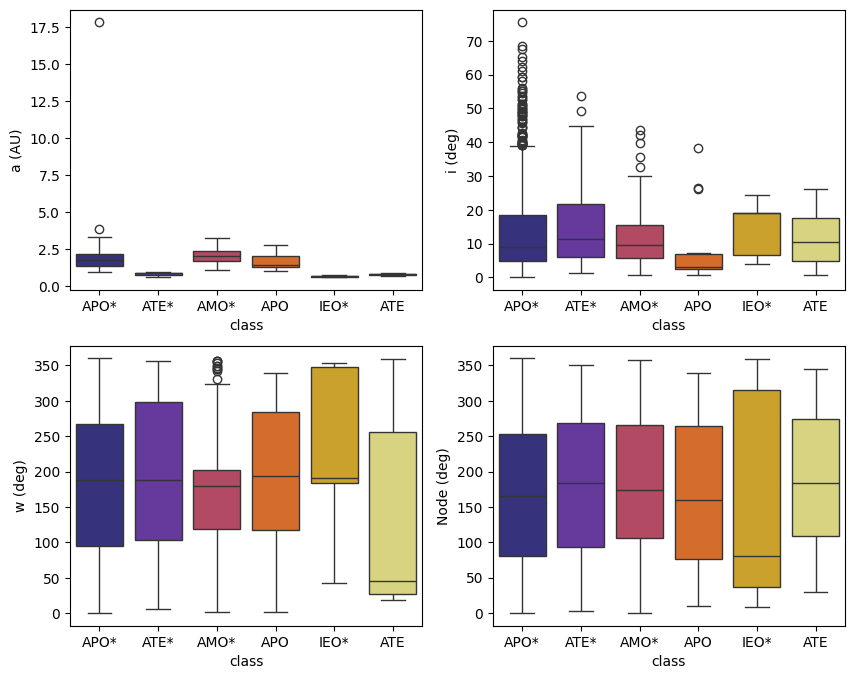

In [10]:
plt.figure(figsize=(10,8),num=1)
plt.subplot(2,2,1)
sns.boxplot(x='class',y='a (AU)',palette='CMRmap',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='class',y='i (deg)',palette='CMRmap',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='class',y='w (deg)',palette='CMRmap',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='class',y='Node (deg)',palette='CMRmap', data=data)

<Axes: xlabel='class', ylabel='P (yr)'>

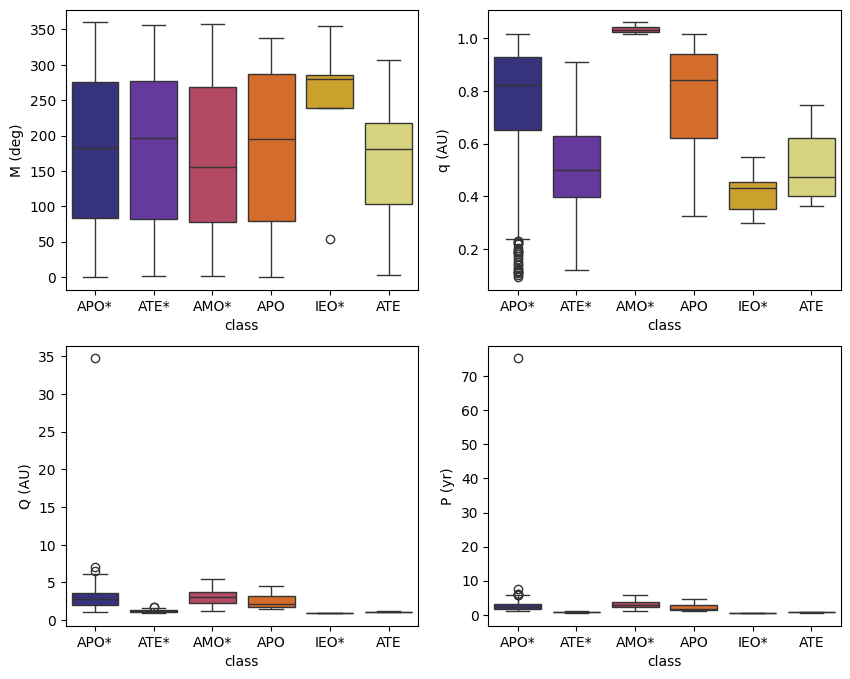

In [11]:
plt.figure(figsize=(10,8),num=1)
plt.subplot(2,2,1)
sns.boxplot(x='class',y='M (deg)',palette='CMRmap',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='class',y='q (AU)',palette='CMRmap',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='class',y='Q (AU)',palette='CMRmap',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='class',y='P (yr)',palette='CMRmap', data=data)

## Podział danych

In [12]:
X = data.drop('class',axis=1)
X = X.drop('Q (AU)',axis=1) ## Usuwamy Q ponieważ ma bardzo duzą korelację z a
Y = data['class']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=104)

## Tworzenie modeli

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
accuracy = []
for i in range(1,200):    
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,Y_train)
    predK = kn.predict(X_test)
    accuracy.append([accuracy_score(Y_test,predK),i])
temp = accuracy[0]
for m in accuracy:
    if temp[0] < m[0]:
        temp=m
kno = KNeighborsClassifier(n_neighbors=temp[1])

In [18]:
from sklearn.svm import SVC
svc = SVC()

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [20]:
from sklearn.metrics import accuracy_score,classification_report
accuracy = []
models = [lr,rfc,knn,kno,svc,grid]
for m in models:
    m.fit(X_train,Y_train)
    prediction = m.predict(X_test)
    accuracy.append([m,accuracy_score(Y_test,prediction)])

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.849 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.849 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.849 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.852 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.848 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.849 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.849 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.849 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.848 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.849 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [25]:
temp = accuracy[0]
for m in accuracy:
    if temp[1]<m[1]:
        temp=m

### Najlepszym modelem jest Random Forest Calssifier który daje dokładność 99.62%

In [22]:
print(classification_report(Y_test,temp[0].predict(X_test)))
print("Accuracy of this model: ",round(accuracy_score(Y_test,temp[0].predict(X_test))*100,2),'%')

              precision    recall  f1-score   support

        AMO*       0.97      1.00      0.99        33
         APO       1.00      1.00      1.00         4
        APO*       1.00      1.00      1.00       438
         ATE       1.00      1.00      1.00         2
        ATE*       1.00      0.98      0.99        48

    accuracy                           1.00       525
   macro avg       0.99      1.00      0.99       525
weighted avg       1.00      1.00      1.00       525

Accuracy of this model:  99.62 %


# Pobranie danych z naszej bazy do .json

In [ ]:
import os
import json
from pymongo import MongoClient

uri = os.getenv("MONGO_URI")
if not uri:
    raise ValueError("MONGO_URI environment variable is not set")

client = MongoClient(uri)

db = client["NEO-Cluster"]
collection = db["asteroids"]

asteroids = collection.find()

asteroid_list = list(asteroids)

with open("new_orbits_data.json", mode="w", encoding="utf-8") as file:
    json.dump(asteroid_list, file, default=str, indent=4)

print("Dane zostały zapisane do pliku new_orbits_data.json")


# Wyciągnięcie potrzebnych danych z json i zapisanie go do pliku csv o strukturze danych treningowych

In [ ]:
import json
import csv

input_json_file = 'new_orbits_data.json'
output_csv_file = 'our_orbits_data.csv'

with open(input_json_file, 'r') as file:
    data = json.load(file)

with open(output_csv_file, 'w', newline='') as csvfile:
    fieldnames = ['a (AU)', 'e', 'i (deg)', 'w (deg)', 'Node (deg)', 'M (deg)', 'q (AU)', 'Q (AU)', 'P (yr)', 'H (mag)', 'MOID (AU)', 'class']
    
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    
    for orbit in data:
        orbital_data_v = orbit.get("orbital_data", {})
        a = orbital_data_v.get('semi_major_axis', '')
        e = orbital_data_v.get('eccentricity', '')
        i = orbital_data_v.get('inclination', '')
        w = orbital_data_v.get('perihelion_argument', '')
        node = orbital_data_v.get('ascending_node_longitude', '')
        M = orbital_data_v.get('mean_anomaly', '')
        q = orbital_data_v.get('perihelion_distance', '')
        Q = orbital_data_v.get('aphelion_distance', '')
        P_days = orbital_data_v.get('orbital_period', '')
        H = orbit.get('absolute_magnitude_h', '')
        MOID = orbital_data_v.get('minimum_orbit_intersection', '')
        class_type = orbital_data_v.get('orbit_class', {}).get('orbit_class_type', '')
        
        P_yr = float(P_days) / 365.25 if P_days else ''
        
        row = {
            'a (AU)': a,
            'e': e,
            'i (deg)': i,
            'w (deg)': w,
            'Node (deg)': node,
            'M (deg)': M,
            'q (AU)': q,
            'Q (AU)': Q,
            'P (yr)': P_yr,
            'H (mag)': H,
            'MOID (AU)': MOID,
            'class': class_type
        }
        
        writer.writerow(row)

print(f"Dane zostały zapisane do pliku {output_csv_file}.")

Testing models on our api data

In [23]:

new_data = pd.read_csv('our_orbits_data.csv')
X_new = new_data.drop(['class', 'Q (AU)'], axis=1)
Y_new = new_data['class']

# Assuming temp[0] is your best model
best_model = temp[0]
predictions_new = best_model.predict(X_new)


Y_new = Y_new.astype(str) 
predictions_new = predictions_new.astype(str)
predictions_new = [label.replace('*', '') for label in predictions_new]

print("Classification Report for New Data:")
print (Y_new)
print(predictions_new)
print(classification_report(Y_new, predictions_new))
print("Accuracy of the best model on new data: ", round(accuracy_score(Y_new, predictions_new) * 100, 2), '%')


Classification Report for New Data:
0        AMO
1        AMO
2        AMO
3        AMO
4        AMO
        ... 
37186    AMO
37187    APO
37188    ATE
37189    APO
37190    APO
Name: class, Length: 37191, dtype: object
['AMO', 'AMO', 'AMO', 'AMO', 'AMO', 'APO', 'APO', 'APO', 'APO', 'ATE', 'AMO', 'AMO', 'ATE', 'APO', 'AMO', 'AMO', 'APO', 'AMO', 'APO', 'APO', 'AMO', 'APO', 'AMO', 'APO', 'AMO', 'AMO', 'AMO', 'AMO', 'AMO', 'AMO', 'APO', 'APO', 'APO', 'AMO', 'APO', 'AMO', 'AMO', 'ATE', 'APO', 'APO', 'AMO', 'APO', 'AMO', 'APO', 'AMO', 'AMO', 'AMO', 'AMO', 'ATE', 'AMO', 'APO', 'AMO', 'APO', 'APO', 'APO', 'AMO', 'APO', 'ATE', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'APO', 'AMO', 'APO', 'APO', 'APO', 'APO', 'APO', 'AMO', 'AMO', 'APO', 'APO', 'APO', 'AMO', 'APO', 'AMO', 'APO', 'AMO', 'APO', 'APO', 'AMO', 'ATE', 'APO', 'ATE', 'AMO', 'AMO', 'AMO', 'APO', 'AMO', 'APO', 'APO', 'AMO', 'APO', 'AMO', 'AMO', 'AMO', 'APO', 'AMO', 'APO', 'ATE', 'APO', 'APO', 'APO', 'AMO', 'AMO', 'APO', 'AMO', '